In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("input_data/remnant_composition.csv")

In [3]:
df.columns

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'],
      dtype='object')

In [4]:
df["embedded_mass_fraction"]=(df["mass,"].cumsum()/df["mass,"].sum())

In [5]:
df["remnant_mass_fraction"]=1.0e00-df["embedded_mass_fraction"]

In [6]:
df[["mass,","embedded_mass_fraction","remnant_mass_fraction"]]

,"mass,",embedded_mass_fraction,remnant_mass_fraction
0,1.312658e+30,0.001,9.990001e-01
1,1.312686e+30,0.002,9.980001e-01
2,1.312821e+30,0.003,9.970000e-01
3,1.312681e+30,0.004,9.960001e-01
4,1.312702e+30,0.005,9.950001e-01
...,...,...,...
995,1.312750e+30,0.996,4.000185e-03
996,1.312809e+30,0.997,3.000125e-03
997,1.312757e+30,0.998,2.000104e-03
998,1.312708e+30,0.999,1.000120e-03


In [7]:
columns_to_keep = ['remnant_mass_fraction', 'xn_p,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_ne20,','xn_ne22,','xn_mg24,'
                   ,'xn_si28,','xn_ni56,']

In [8]:
df1=df[columns_to_keep]

In [17]:
df1=df1.loc[::-1].reset_index(drop=True)
column_to_move = df1['remnant_mass_fraction']

# Remove the column from the DataFrame
df1 = df1.drop('remnant_mass_fraction', axis=1)

# Insert the column at the desired position
insert_position = 0  # Replace with the desired position index


In [18]:
df1= df1.div(df1.sum(axis=1), axis=0)

In [20]:
df1.insert(insert_position, 'q_m', column_to_move)


In [21]:
print(df1)

              q_m         xn_p,       xn_he4,   xn_c12,       xn_n14,  \
0    9.990001e-01  1.000000e-30  7.326613e-08  0.500000  1.400005e-29   
1    9.980001e-01  1.000000e-30  6.945016e-08  0.500000  1.400005e-29   
2    9.970000e-01  1.000000e-30  8.055901e-08  0.500000  1.400005e-29   
3    9.960001e-01  1.000000e-30  1.174176e-07  0.500000  1.400008e-29   
4    9.950001e-01  1.000000e-30  1.636196e-07  0.500000  1.400011e-29   
..            ...           ...           ...       ...           ...   
995  4.000185e-03  5.581049e-04  1.209096e-02  0.086582  1.283389e-07   
996  3.000125e-03  5.575104e-04  1.199796e-02  0.086045  1.261475e-07   
997  2.000104e-03  5.571822e-04  1.190952e-02  0.085334  1.258358e-07   
998  1.000120e-03  5.509844e-04  1.181995e-02  0.087232  1.293159e-07   
999 -2.220446e-16  5.478346e-04  1.171397e-02  0.087807  1.282350e-07   

      xn_o16,      xn_ne20,      xn_ne22,      xn_mg24,      xn_si28,  \
0    0.500000  1.228276e-17  2.200144e-29  7.14436

In [13]:
df1_rescaled.to_csv('output_data/composition.dat', sep='\t', index=False)


In [15]:
columns_to_keep_2 = ['remnant_mass_fraction','density,', 'T,']

In [16]:
df2=df[columns_to_keep_2]

In [17]:
df2=df2.loc[::-1].reset_index(drop=True)

In [18]:
df2.to_csv('output_data/entropy.dat', sep='\t', index=False)


In [93]:
columns_to_plot = ['xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59']


54


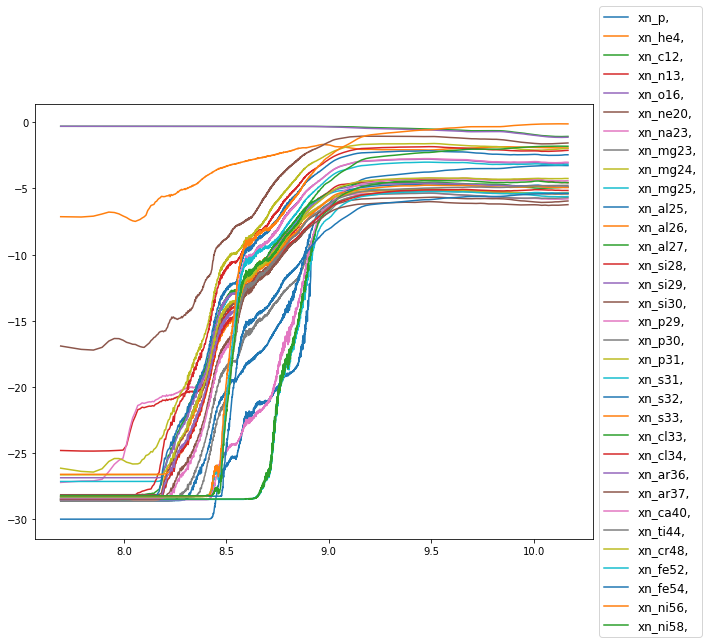

In [126]:
import matplotlib.pyplot as plt
import numpy as np
num_columns = len(df[columns_to_plot].columns[:-1])  # Exclude the X-axis column
print(num_columns)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df[columns_to_plot].columns[:-1]):
    if max(df[column])>1.0e-6:
        plt.plot(np.log10(df["r_outer,"]), np.log10(df[column]), label=column)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize='large')


In [119]:
max_column = df[columns_to_plot].iloc[:, :-1].max().idxmax()
print(max_column)

xn_ni56,
